# Loan Prediction

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.

## 1. Importing the libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 2.Loading the dataset

In [ ]:
df = pd.read_csv("/content/train_u6lujuX_CVtuZ9i (1).csv")

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df.shape

(614, 13)

the data set has 614 rows and 13 columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 5 integer columns and 8 object columns

## 3. Data Cleaning

checking out if there are missing data in the dataset

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


rows with missing data are removed to ensure the dataset is completer for modelling. The Loan_ID column, which is just an identifier and holds no predictive value, is dropped.

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [ ]:
df = df.drop(columns=['Loan_ID'])

In [ ]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 48.8+ KB


## 4.Transforming Features

4.1 The Dependants column has a special category '3+' which is converted to 4 for numerical consistency. This allows the column to be treated as a numeric feature.

In [ ]:
df['Dependents'] = df['Dependents'].replace('3+', 4).astype(int)

4.2 Encoding Binary Categorical variables

Columns such as Gender, Married, Self_Employed, and Loan_Status have two categories are converted into numerical labels (0 and 1) for model compatibility.

In [ ]:
binary_cols = ['Gender','Married','Self_Employed','Loan_Status']

In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
for col in binary_cols:
  df[col] = le.fit_transform(df[col])

4.3 Columns with more than two categories, like Education and Property_Area, are converted using one-hot encoding. This creates new binary columns representing each category while avoiding redundancy by dropping the first category.

In [ ]:
df = pd.get_dummies(df, columns=['Education', 'Property_Area'], drop_first=True)

In [ ]:
plt.style.use('dark_background')

## 5. Visualizing Loan Status Distributions




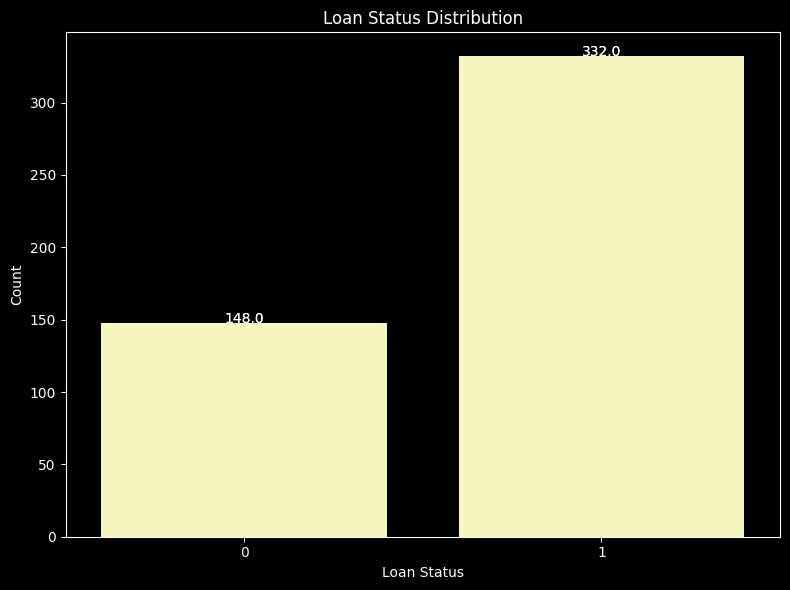

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Loan_Status')
sns.countplot(data=df, x='Loan_Status')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', color='white')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Count')

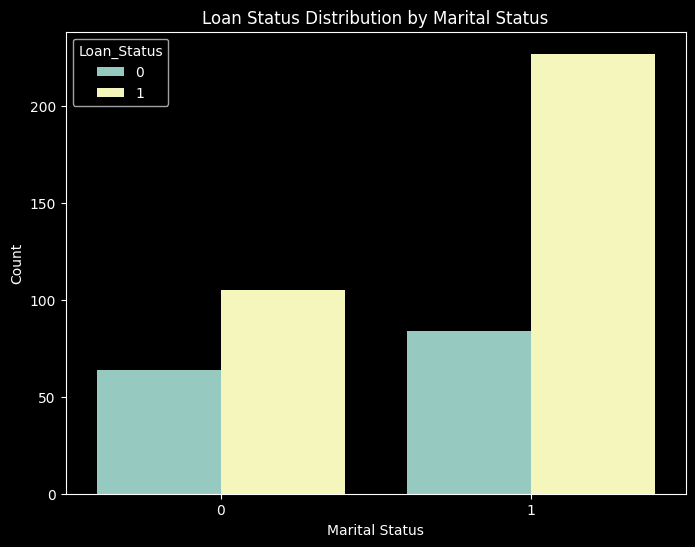

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Married', hue='Loan_Status')
plt.title('Loan Status Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')

In [ ]:
def decode_property_area(row):
    if row['Property_Area_Semiurban'] == 1:
        return 'Urban'
    elif row['Property_Area_Urban'] == 1:
        return 'Semiurban'
    else:
        return 'Rural'

df_decoded = df.copy()
df_decoded['Property_Area'] = df_decoded.apply(decode_property_area, axis=1)


Text(0, 0.5, 'Count')

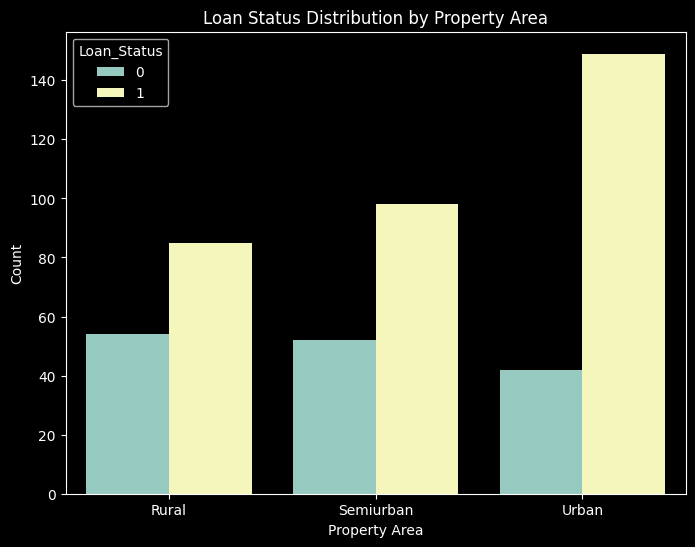

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df_decoded, x='Property_Area', hue='Loan_Status')
plt.title('Loan Status Distribution by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')

## 6. Visualizing Applicant Income Distribution

A histogram with a kernel density estimate displays the spread and skewness of applicant incomes, which can affect loan approval chances

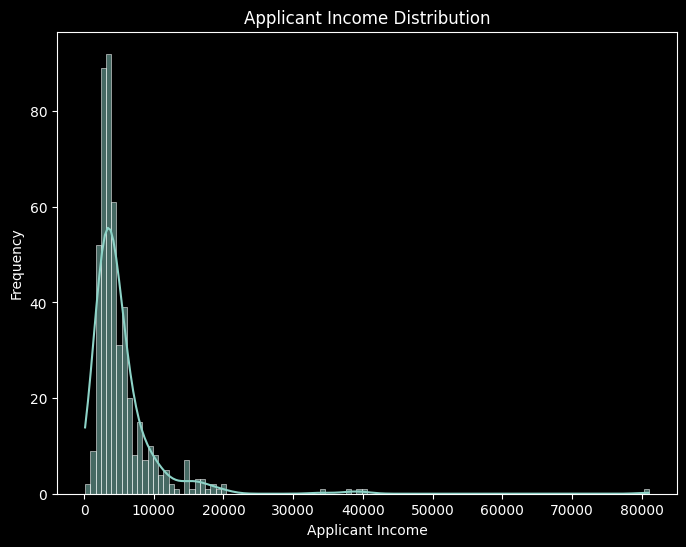

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['ApplicantIncome'], kde=True)
plt.title('Applicant Income Distribution')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

## 7. Feature Correlation Heatmap

A heatmap visualizes correlations between numerical features, helping identify strong positive or negative relationships and potential redundant variables

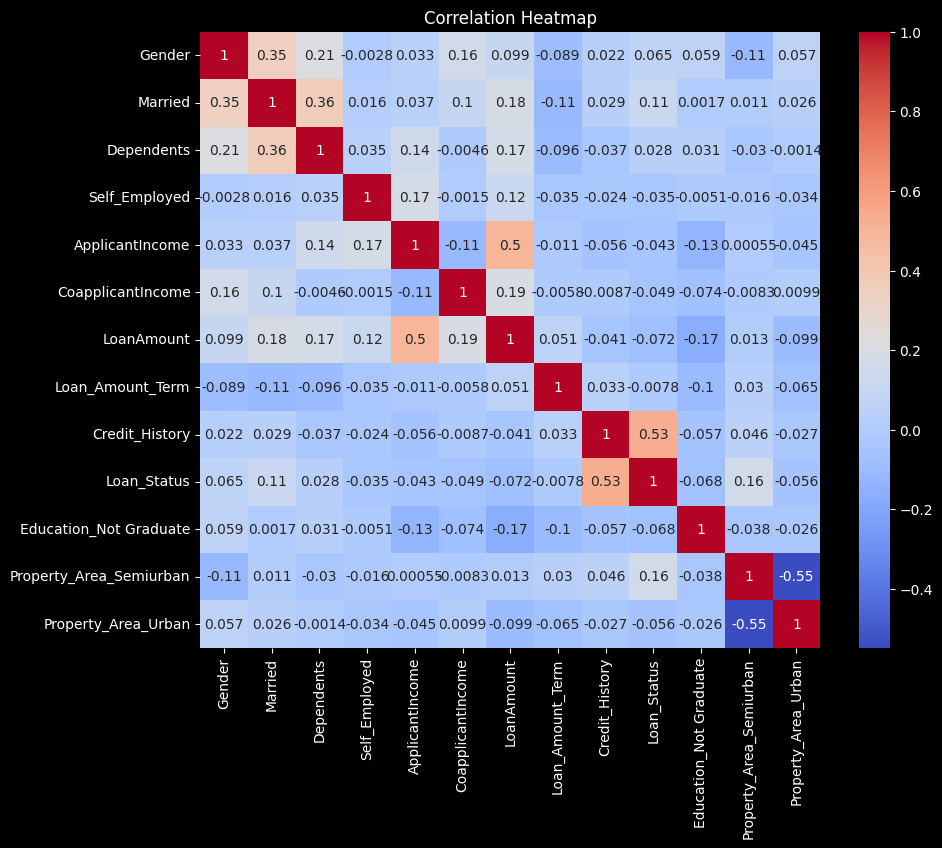

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## 8. Preparing Features and Labels
The dataset is split into features (X) used for training and the target label (y), which indicates loan approval status.

In [ ]:
X = df.drop(columns=['Loan_Status'])
y = df['Loan_Status']

## 9. Splitting Data into Training and Testing Sets

The dataset is didvided into training and testing subsets to evaluate model generalization. A stratified split maintains the class distribution on in both datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## 10. Training the model using Support Vector Machine (SVM)

In [ ]:
from sklearn import svm
classifier = svm.SVC(kernel='linear')

In [ ]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
X_train_prediction = classifier.predict(X_train)

In [ ]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(X_train_prediction, y_train)
training_data_accuracy

0.7708333333333334

In [ ]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)
test_data_accuracy

0.7604166666666666

## Conclusion

There is need for more data.